## Antartica Hub Data

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [44]:
xls = pd.ExcelFile('data.xlsx')
df = pd.read_excel(xls, 'website data')
df

,estimated wait time (mins),number of visitors
0,4.685197,67
1,4.629674,49
2,3.881256,59
3,14.687116,78
4,2.784163,57
...,...,...
9995,3.322873,56
9996,3.820234,58
9997,2.395127,56
9998,3.774301,58


## Estimated Wait Time Fit and Probability Questions (3.1,3.2)

(array([0.00462542, 0.01585858, 0.04328072, 0.08160563, 0.12026093,
        0.15329964, 0.17312287, 0.19096378, 0.18997262, 0.2058312 ,
        0.20054501, 0.18765991, 0.16552397, 0.16255048, 0.15726429,
        0.14537035, 0.12885099, 0.11034931, 0.10440234, 0.09151724,
        0.08259679, 0.06112162, 0.05980008, 0.05385311, 0.04922769,
        0.03997685, 0.0360122 , 0.03039562, 0.03237794, 0.02213594,
        0.02345749, 0.02081439, 0.01949284, 0.01585858, 0.01387626,
        0.01123316, 0.00991161, 0.00958123, 0.00825968, 0.00859007,
        0.00925084, 0.00462542, 0.00528619, 0.00198232, 0.00495581,
        0.0026431 , 0.00297348, 0.0026431 , 0.00297348, 0.00198232,
        0.00099116, 0.00165194, 0.00165194, 0.00165194, 0.00231271,
        0.00132155, 0.00066077, 0.00165194, 0.00132155, 0.00165194,
        0.00066077, 0.00033039, 0.00066077, 0.00033039, 0.        ,
        0.00099116, 0.00066077, 0.00066077, 0.        , 0.        ,
        0.00099116, 0.        , 0.        , 0.  

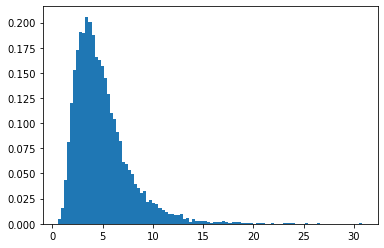

In [91]:
plt.hist(df['estimated wait time (mins)'], bins=100,density=True)

This looks like a gamma distribution, but lets look further to see if it fits.

### Fit of the Estimated Wait Time (3.1)

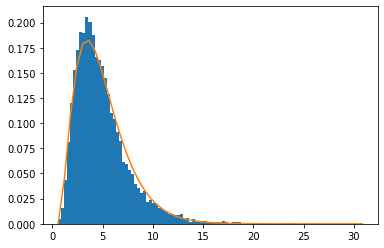

In [108]:
plt.hist(df['estimated wait time (mins)'], bins=100,density=True)
[a_fit,loc_fit,scale_fit]=stats.gamma.fit(df['estimated wait time (mins)'].values)
wait=np.linspace(np.min(df['estimated wait time (mins)'].values),np.max(df['estimated wait time (mins)'].values))
plt.plot(wait,stats.gamma.pdf(wait,a_fit,loc=loc_fit,scale=scale_fit),)

Wait time does indeed fit a gamma distribution relatively well. Gamma distirbutions are positive and skewed. They naturally occur in scenarios where timing or frequency is important, so we can use them to model wait times.

### Probability Average Wait Time > 10 Minutes (3.2)

In [121]:
x = np.sort(df['estimated wait time (mins)'].values)
y = 1. * np.arange(len(df['estimated wait time (mins)'].values)) / (len(df['estimated wait time (mins)'].values) - 1)

In [122]:
import plotly.express as px

fig = px.line(x=x, y=y, title='CDF of Estimated Wait Time')
fig.show()

As you can see above you have around a 5% chance to have a wait time over 10 minutes.

## Number of Visitors Fit and Probability Questions (3.1,3.2)

(array([0.00032787, 0.00016393, 0.        , 0.0004918 , 0.00016393,
        0.        , 0.00032787, 0.        , 0.00147541, 0.00163934,
        0.        , 0.00278689, 0.        , 0.0052459 , 0.0057377 ,
        0.        , 0.00786885, 0.        , 0.01147541, 0.0147541 ,
        0.        , 0.01901639, 0.02065574, 0.        , 0.02918033,
        0.        , 0.03311475, 0.04196721, 0.        , 0.04754098,
        0.        , 0.06032787, 0.06377049, 0.        , 0.06918033,
        0.        , 0.07639344, 0.08262295, 0.        , 0.08196721,
        0.08278689, 0.        , 0.09360656, 0.        , 0.08622951,
        0.07721311, 0.        , 0.07918033, 0.        , 0.07737705,
        0.06721311, 0.        , 0.0642623 , 0.        , 0.05885246,
        0.04491803, 0.        , 0.04491803, 0.        , 0.03688525,
        0.03213115, 0.        , 0.02344262, 0.02114754, 0.        ,
        0.01459016, 0.        , 0.01295082, 0.01081967, 0.        ,
        0.00754098, 0.        , 0.00688525, 0.00

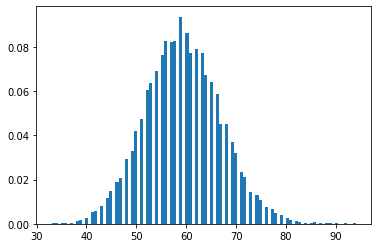

In [90]:
plt.hist(df['number of visitors'], bins=100,density=True)

The number of visitors seems like a normal distribution, but lets look further to see if it fits.

### Fit of the Number of Visitors (3.1)

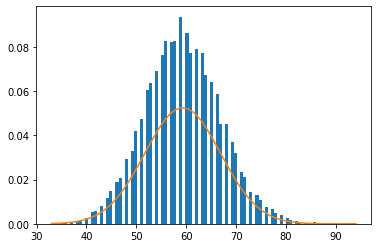

In [132]:
plt.hist(df['number of visitors'], bins=100,density=True)
[mean_fit,std_fit]=stats.norm.fit(df['number of visitors'].values)
visitors=np.linspace(np.min(df['number of visitors'].values),np.max(df['number of visitors'].values))
plt.plot(wait,stats.norm.pdf(visitors,mean_fit,std_fit),)

In [133]:
np.mean(df['number of visitors'].values)

59.2909

We can see our distribution has a high kurtosis, but roughly fits a normal distribution. This is because the number of visitors peaks at around the mean of the distribution, which is 59.2909.

### Probability the Number of Visitors < 46 (3.2)

In [134]:
x = np.sort(df['number of visitors'].values)
y = 1. * np.arange(len(df['number of visitors'].values)) / (len(df['number of visitors'].values) - 1)

In [135]:

fig = px.line(x=x, y=y, title='CDF of Number of Visitors')
fig.show()

As you can see from our CDF we have around a 3.2% chance of the number of visitors being less than 46.

## Relationship between Visitors and Wait Time (3.3)

In [130]:
fig = px.scatter(df, x="estimated wait time (mins)", y="number of visitors", title='Correlation between Wait Time and Visitors')
fig.show()

In [131]:
df.corr()

,estimated wait time (mins),number of visitors
estimated wait time (mins),1.000000,0.691988
number of visitors,0.691988,1.000000


You can see that Wait time and visitors has a positive correlation that looks close to a logarithmic correlation. Since we know that this correlation is logarithmic we can build a logarithmic regression model to predict wait time based off the number of visitors. One thing to note too is that once you get past a wait time of around 12 minutes there are a lot less data points, so our prediction would suffer past that point.

## Continuous Conditional Probability  of Wait Time based on Amount of Visitors (3.4)


Probability that when there are 50 or more visitors, the wait time is more than 7.5 minutes.

P(Wait Time > 7.5 minutes | Number of Visitors > 50)= P(Wait Time>7.5 n Number of Visitors >50)/P(Number of Visitors > 50)

First let's visualize the joint distribution of our data

### 2D Histogram of our data

Text(0, 0.5, 'Number of Visitors')

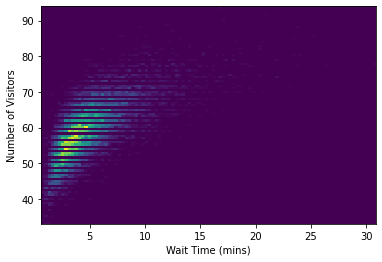

In [156]:
plt.hist2d(df['estimated wait time (mins)'], df['number of visitors'], bins=100)
plt.xlabel('Wait Time (mins)')
plt.ylabel('Number of Visitors')

### Jointplot of our data

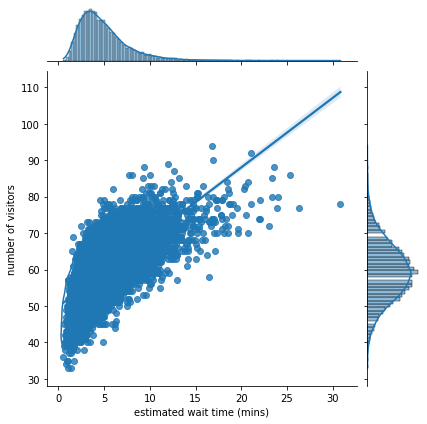

In [159]:
sns.jointplot(x='estimated wait time (mins)', y='number of visitors', data=df, kind='reg').plot_joint(sns.kdeplot)
plt.show()

If we assume that wait time and visitors are indepdent variables: the conditional probability equation is as follows.

# P(Wait Time > 7.5 minutes | Number of Visitors > 50)= P(Wait Time >7.5 minutes)

Since the probability of Waiting time being greater than 7.5 minutes is .1435 than the conditional probability is also .1435.